In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## detecting the null values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [8]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


## drop the null values

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


## 3.. Data Pre-process 

In [13]:
data = train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [16]:
data.dtypes


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## convert object data type to datetime dtype

In [17]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [18]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [19]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [20]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [21]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [22]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [23]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [24]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [25]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-02-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-26 05:50:00,2024-02-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


## clean Dep_Time & Arrival_Time & then extract Derived attributes

In [26]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [27]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [28]:
extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-02-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-26 05:50:00,2024-02-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [29]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-02-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-26 05:50:00,2024-02-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [30]:
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [31]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [32]:
data.shape

(10682, 16)

## analyse when will most of the flights take-off..

In [33]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [34]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

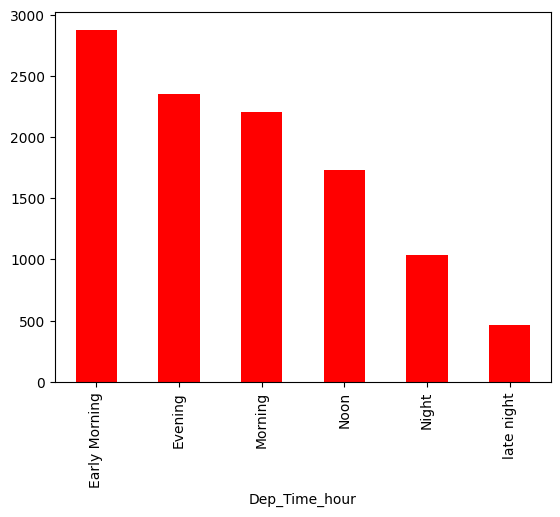

In [35]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="r")

In [36]:
#!pip install plotly
# !pip install chart_studio

In [37]:
# !pip install cufflinks

In [38]:
# pip install --upgrade pip

In [39]:

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()



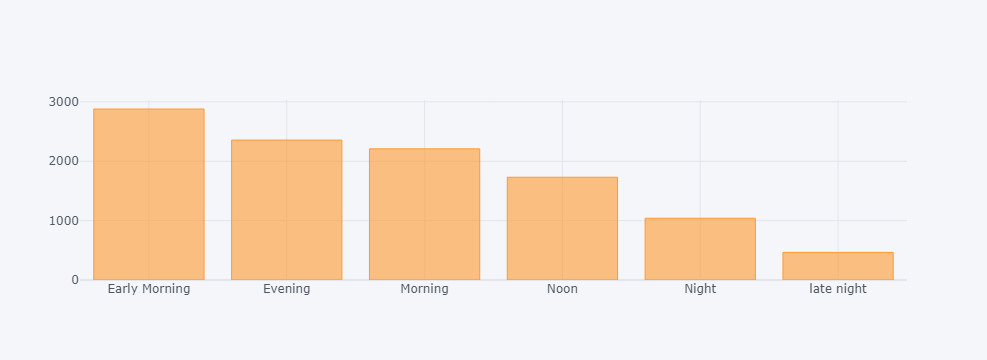

In [40]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

## Pre-process Duration Feature & extract meaningful features from it..

In [41]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [42]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [43]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [44]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [45]:
data['Duration'][0]

'2h 50m'

In [46]:
'2h 50m'.split(' ')

['2h', '50m']

In [47]:
'2h 50m'.split(' ')[0]

'2h'

In [48]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [49]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [50]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [51]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [52]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [53]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [54]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [55]:
pd.to_timedelta(data["Duration"]).dt.components.hours

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: hours, Length: 10682, dtype: int64

In [56]:
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours

In [57]:
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

## Analyse whether Duration impacts Price or not ?

In [58]:
data['Duration'] # convert duration into total minutes duration ..

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [59]:
2*60

120

In [60]:
'2*60'

'2*60'

In [61]:
eval('2*60')

120

In [62]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [63]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [64]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

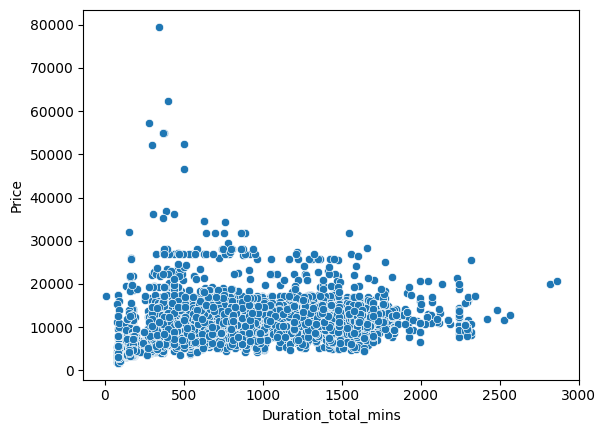

In [65]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

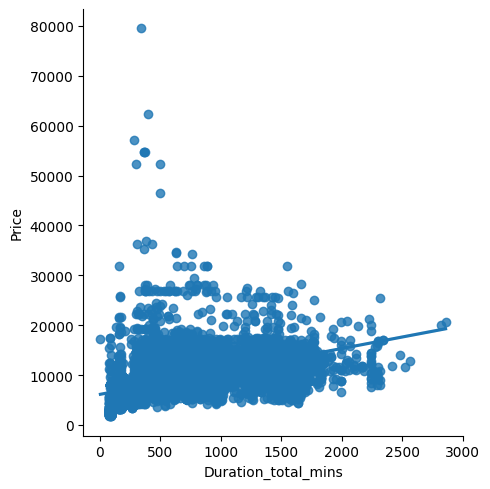

In [66]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

### pretty clear that As the duration of minutes increases Flight price also increases.

In [67]:
### lets understand whether total stops affect price or not !

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

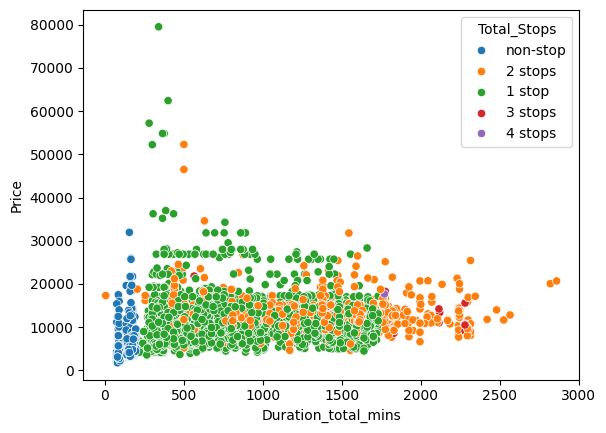

In [68]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

## on which route Jet Airways is extremely used?

In [69]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [70]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## Performing Airline vs Price Analysis.. 
        

In [71]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

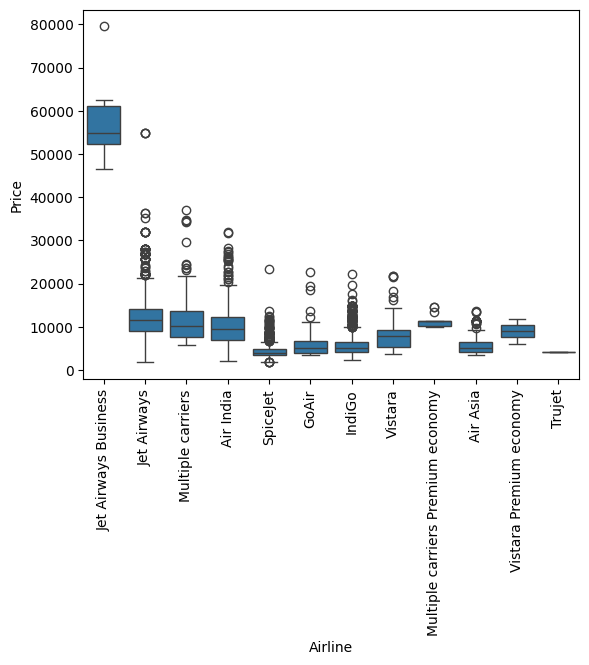

In [72]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

## one-hot Encoding on data..

In [73]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2019,22,20,1,10,2,50,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,2019,5,50,13,15,7,25,7,25,445


In [74]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [75]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [76]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [77]:
# Applying One-hot from scratch :

In [78]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [79]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [80]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [81]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


## Target Encoding

In [82]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [83]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0


In [84]:
data['Airline'].nunique()

12

In [85]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [86]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [87]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [88]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [89]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [90]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [91]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [92]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


In [93]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [94]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [95]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [96]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [97]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [98]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [99]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [100]:
data['Destination'] = data['Destination'].map(dict_dest)

In [101]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [102]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


## Label(Manual) Encoding 

In [103]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


In [104]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [105]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [106]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [107]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [108]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

## Remove Un-necessary features 

In [109]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0


In [110]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [111]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [112]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,5,25,5,25,325,0,1,0,0,0


In [113]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [114]:
data['Journey_year'].unique()

array([2019])

In [115]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [116]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [117]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,...,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,...,10,2,50,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,...,15,7,25,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,...,25,19,0,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,...,30,5,25,5,25,0,1,0,0,0


In [118]:
data.drop(columns=['Route'] , axis=1 , inplace=True)

## we can drop Route as well bcz Route is directly related to Total stops & considering 2 same features doesnt make sense while building ML model..

In [119]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,19,0,0,0,1,0,0


In [120]:
data.drop(columns=['Duration'] , axis=1 , inplace=True)

In [121]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,19,0,0,0,1,0,0


## outlier detection

In [122]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

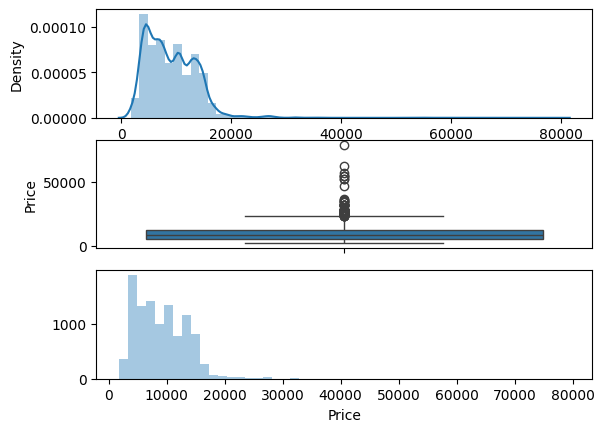

In [123]:
plot(data , 'Price')

In [124]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [125]:
print(maximum)

23017.0


In [126]:
print(minimum)

-5367.0


In [127]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [128]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

## deal with Outlier

In [154]:
data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

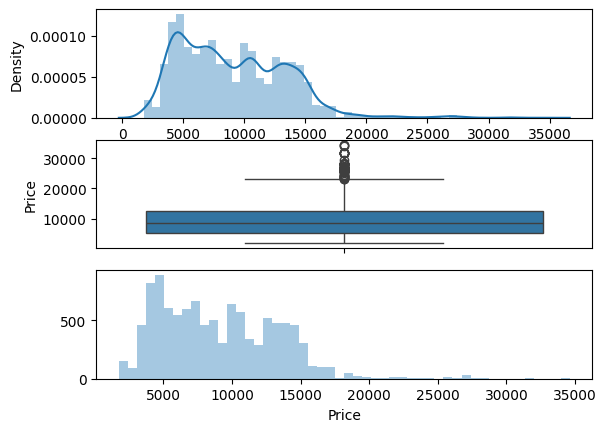

In [130]:
plot(data , 'Price')

## feature selection

In [132]:
X = data.drop(['Price'] , axis=1)

In [133]:
y = data['Price']

In [134]:
from sklearn.feature_selection import mutual_info_regression

In [135]:
imp = mutual_info_regression(X , y)

In [137]:
imp

array([1.32032377, 1.06099629, 0.79781305, 0.36926093, 0.62199614,
       0.92954481, 0.75783002, 1.14383532, 0.89585777, 1.1211325 ,
       0.67639316, 0.95070649, 0.67860489, 0.38366255, 0.46244629,
       0.51913532, 0.13583793, 0.20055342])

In [138]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [139]:
imp_df.columns = ['importance']

In [140]:
imp_df

,importance
Airline,1.320324
Destination,1.060996
Total_Stops,0.797813
Journey_day,0.369261
Journey_month,0.621996
Dep_Time_hour,0.929545
Dep_Time_minute,0.757830
Arrival_Time_hour,1.143835
Arrival_Time_minute,0.895858
Duration_hours,1.121133


In [141]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Airline,1.320324
Arrival_Time_hour,1.143835
Duration_hours,1.121133
Destination,1.060996
Duration_hour,0.950706
Dep_Time_hour,0.929545
Arrival_Time_minute,0.895858
Total_Stops,0.797813
Dep_Time_minute,0.757830
Duration_minute,0.678605


##  Machine Learning model

#### split dataset into train & test

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
ml_model = RandomForestRegressor()

In [146]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [147]:
y_pred = ml_model.predict(X_test)

In [148]:
y_pred

array([16805.07,  5455.28,  8831.66, ...,  3557.24,  6555.88,  6878.42])

In [149]:
from sklearn import metrics

In [150]:
metrics.r2_score(y_test , y_pred)

0.8108567364954001

### Save model

In [152]:
import pickle

In [159]:
with open("ml_model.pkl", 'wb') as f:
    model = pickle.dump(ml_model,f)

In [168]:
import pickle

with open("ml_model.pkl", 'rb') as f:
    forest = pickle.load(f)


In [166]:
# model = open(r'project/my_project/flight_price_project/ml_model.pkl' , 'rb')

In [174]:
y_pred_test = forest.predict(X_test)
y_pred_test

array([16805.07,  5455.28,  8831.66, ...,  3557.24,  6555.88,  6878.42])

In [173]:
metrics.r2_score(y_test , y_pred_test)

0.8108567364954001

##  to automate ml pipeline & to define your Evaluation metric..

### to make our own metric...

In [175]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [176]:
mape(y_test , y_pred)

13.239119190476126

## to automate ml pipeline !

In [177]:
from sklearn import metrics

In [178]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9514744667420998
predictions are : [16906.92  5346.33  8761.84 ...  3496.33  6233.64  6878.29]


r2 score : 0.809366892492508
MAE : 1180.184741732767
MSE : 3711169.0199327585
RMSE : 1926.439466978591
MAPE : 13.208423770489283


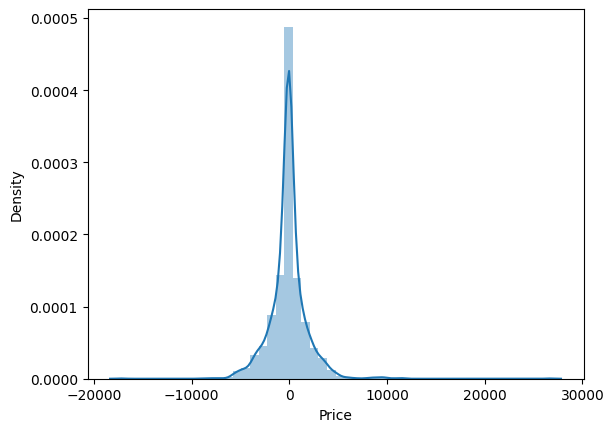

In [179]:
predict(RandomForestRegressor())

In [180]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score : 0.6779393066761358
MAE : 1407.4175464869586
MSE : 6269748.645599859
RMSE : 2503.94661396761
MAPE : 15.477004756659435


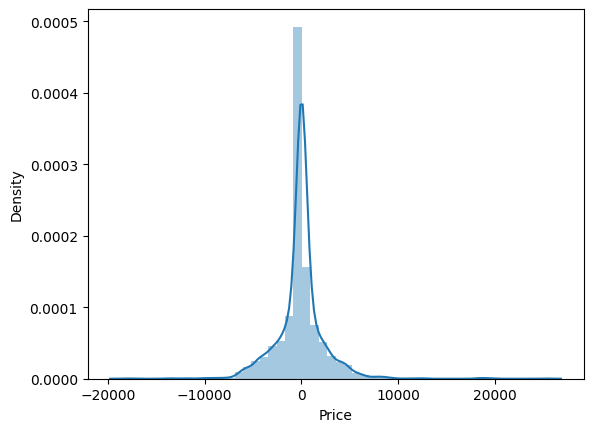

In [181]:
predict(DecisionTreeRegressor())

## hypertune ml model

In [182]:
from sklearn.model_selection import RandomizedSearchCV

In [183]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [184]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [185]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [186]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [187]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [188]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [189]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [190]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [191]:
#### In your case , may be your parameters may vary a little bit , thats not a major issue..

In [192]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, max_features='sqrt', min_samples_split=5,
                      n_estimators=540)

In [193]:
rf_random.best_score_

0.7945131177808902